In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import librosa
import librosa.display
import matplotlib.pyplot as plt

def generate_cqt_chromagram(audio, sr=None, mono=True):
    #Load the audio file
    y, sr = librosa.load(audio, sr=sr, mono=mono)

    #Compute the CQT absolute amplitudes
    cqt = np.abs(librosa.cqt(y=y, sr=sr, hop_length=512, n_bins=7*12)) #7 octaves, 12 bins per octave
    cqt_db = librosa.amplitude_to_db(cqt, ref=np.max)

    #Compute the chromagram from the CQT
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=512)

    return chroma, cqt_db, sr

def plot_cqt_spectrogram(cqt_db, sr):
    plt.figure(figsize=(12, 4)) #or 10, 4
    librosa.display.specshow(cqt_db, sr=sr, x_axis='time', y_axis='cqt_hz')
    plt.title('CQT')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

#Helper function to process an audio file into a spectrogram
def process_audio_file(audio_path, duration=2.0, plot=False):
    #load and trim audio to the desired duration
    y, sr = librosa.load(audio_path, sr=None, mono=True)
    y = y[:int(duration * sr)]

    #generate spectrogram
    chroma, cqt_db, sr = generate_cqt_chromagram(audio_path, sr=sr)
    if plot:
        plot_cqt_spectrogram(cqt_db, sr)

    return cqt_db

#Define dataset paths
# DATASET_PATH = '/content/drive/My Drive/Colab Notebooks/APS360-project/Split_Chords_Dataset/'
DATASET_PATH = '/content/drive/My Drive/Split_Chords_Dataset/'
TRAIN_PATH = os.path.join(DATASET_PATH, 'train')
VAL_PATH = os.path.join(DATASET_PATH, 'val')
TEST_PATH = os.path.join(DATASET_PATH, 'test')

# Updated load_dataset function that uses process_audio_file_img
def load_dataset(dataset_path):
    data = []

    for class_label in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_label)
        if not os.path.isdir(class_path):
            continue

        audio_files = os.listdir(class_path)
        print(f"Loading {len(audio_files)} files from class '{class_label}'")

        for audio_file in tqdm(audio_files, desc=f"Processing {class_label}"):
            audio_path = os.path.join(class_path, audio_file)
            #process audio file for spectogram
            spec = process_audio_file(audio_path, duration=2.0, plot=False)
            data.append((spec, class_label))

    print("\nProcessed ", len(data), " files in ", dataset_path)
    return np.array(data, dtype=object)

#Load datasets
train_data = load_dataset(TRAIN_PATH)
val_data = load_dataset(VAL_PATH)
test_data = load_dataset(TEST_PATH)
print("\nDatasets Loaded!\n")

#convert to Pandas DataFrames for handling
columns = ['spectrogram', 'label']
df_train = pd.DataFrame(train_data, columns=columns)
df_val = pd.DataFrame(val_data, columns=columns)
df_test = pd.DataFrame(test_data, columns=columns)
print("\nConverted to Pandas DataFrames\n")

#save the DataFrames as pickle files
output_dir = '/content/drive/My Drive/APS360-project/Chord_Pandas_Dataset_specto/'
os.makedirs(output_dir, exist_ok=True)

df_train.to_pickle(os.path.join(output_dir, 'train.pkl'))
df_val.to_pickle(os.path.join(output_dir, 'val.pkl'))
df_test.to_pickle(os.path.join(output_dir, 'test.pkl'))

print("Datasets loaded and saved in", output_dir)


In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import librosa
import librosa.display
import matplotlib.pyplot as plt

def generate_cqt_chromagram(audio, sr=None, mono=True):
    #Load the audio file
    y, sr = librosa.load(audio, sr=sr, mono=mono)

    #Compute the CQT absolute amplitudes
    cqt = np.abs(librosa.cqt(y=y, sr=sr, hop_length=512, n_bins=7*12)) #7 octaves, 12 bins per octave
    cqt_db = librosa.amplitude_to_db(cqt, ref=np.max)

    #Compute the chromagram from the CQT
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=512)

    return chroma, cqt_db, sr

def plot_cqt_spectrogram(cqt_db, sr):
    plt.figure(figsize=(12, 4)) #or 10, 4
    librosa.display.specshow(cqt_db, sr=sr, x_axis='time', y_axis='cqt_hz')
    plt.title('CQT')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

#Helper function to process an audio file into a spectrogram
def process_audio_file(audio_path, duration=2.0, plot=False):
    #load and trim audio to the desired duration
    y, sr = librosa.load(audio_path, sr=None, mono=True)
    y = y[:int(duration * sr)]

    #generate spectrogram
    chroma, cqt_db, sr = generate_cqt_chromagram(audio_path, sr=sr)
    if plot:
        plot_cqt_spectrogram(cqt_db, sr)

    return cqt_db

#Define dataset paths
# DATASET_PATH = '/content/drive/My Drive/Colab Notebooks/APS360-project/Split_Chords_Dataset/'
DATASET_PATH = '/content/drive/My Drive/Testing_batch_2_2.0/'

# Updated load_dataset function that uses process_audio_file_img
def load_dataset(dataset_path):
    data = []

    for class_label in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_label)
        if not os.path.isdir(class_path):
            continue

        audio_files = os.listdir(class_path)
        print(f"Loading {len(audio_files)} files from class '{class_label}'")

        for audio_file in tqdm(audio_files, desc=f"Processing {class_label}"):
            audio_path = os.path.join(class_path, audio_file)
            #process audio file for spectogram
            spec = process_audio_file(audio_path, duration=2.0, plot=False)
            data.append((spec, class_label))

    print("\nProcessed ", len(data), " files in ", dataset_path)
    return np.array(data, dtype=object)

#Load datasets
test_data = load_dataset(DATASET_PATH)
print("\nDatasets Loaded!\n")

#convert to Pandas DataFrames for handling
columns = ['spectrogram', 'label']
df_test = pd.DataFrame(test_data, columns=columns)
print("\nConverted to Pandas DataFrames\n")

#save the DataFrames as pickle files
output_dir = '/content/drive/My Drive/APS360-project/Chord_Pandas_Dataset_specto_unseen_1/'
os.makedirs(output_dir, exist_ok=True)

df_test.to_pickle(os.path.join(output_dir, 'test.pkl'))

print("Datasets loaded and saved in", output_dir)


In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import pandas as pd
import librosa

import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import pandas as pd
import librosa

class SpectrogramDataset(Dataset):
    def __init__(self, pkl_file, use_spectrogram=True):
        self.data = pd.read_pickle(pkl_file)
        self.use_spectrogram = use_spectrogram
        self.labels = sorted(self.data['label'].unique())
        self.label_to_idx = {label: idx for idx, label in enumerate(self.labels)}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        specto = self.data.iloc[idx]['spectrogram']
        label = self.data.iloc[idx]['label']

        # Normalize spectrogram to [0, 1] using min-max scaling
        specto_norm = (specto - specto.min()) / (specto.max() - specto.min())
        # Convert to uint8 image, values: 0-255
        img_array = (specto_norm * 255).astype(np.uint8)

        # 2D array -> image
        img = Image.fromarray(img_array)
        img = img.convert("RGB")  # 3 channels
        tensor = transforms.ToTensor()(img)  # img -> tensor

        label_idx = self.label_to_idx[label]

        return tensor, label_idx
'''
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}
'''

"\ndata_transforms = {\n    'train': transforms.Compose([\n        transforms.RandomResizedCrop(224),\n        transforms.RandomHorizontalFlip(),\n        transforms.ToTensor(),\n        transforms.Normalize([0.485, 0.456, 0.406],\n                             [0.229, 0.224, 0.225])\n    ]),\n    'val': transforms.Compose([\n        transforms.Resize(256),\n        transforms.CenterCrop(224),\n        transforms.ToTensor(),\n        transforms.Normalize([0.485, 0.456, 0.406],\n                             [0.229, 0.224, 0.225])\n    ]),\n}\n"

In [7]:
#create dataloaders
import os
from torch.utils.data import DataLoader

test_dataset_new = SpectrogramDataset('/content/drive/My Drive/APS360-project/Chord_Pandas_Dataset_specto_unseen_1/test.pkl', use_spectrogram=True)

test_loader_new  = DataLoader(test_dataset_new, batch_size=32, shuffle=False, num_workers=2)

In [8]:
#create dataloaders
import os
from torch.utils.data import DataLoader

train_dataset = SpectrogramDataset('/content/drive/My Drive/APS360-project/Chord_Pandas_Dataset_specto/train.pkl', use_spectrogram=True)
val_dataset = SpectrogramDataset('/content/drive/My Drive/APS360-project/Chord_Pandas_Dataset_specto/val.pkl', use_spectrogram=True)
test_dataset = SpectrogramDataset('/content/drive/My Drive/APS360-project/Chord_Pandas_Dataset_specto/test.pkl', use_spectrogram=True)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
for label, idx in train_dataset.label_to_idx.items():
    print(f"Label: {idx}, Chord: {label}, length: {len(train_dataset.data[train_dataset.data['label'] == label])}")

Label: 0, Chord: augmented, length: 1244
Label: 1, Chord: diminished, length: 1215
Label: 2, Chord: major, length: 1231
Label: 3, Chord: minor, length: 1206


In [19]:
#CNN model
import torch.nn as nn
import torch.nn.functional as F

class SpectrogramCNN(nn.Module):
    def __init__(self):
        super(SpectrogramCNN, self).__init__()
        #input shape is (3, 87, 255)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(128 * 5 * 5, 256)  # Updated the input size of fc1
        self.fc2 = nn.Linear(256, 4)  #4 chord class outputs

    def forward(self, x):
        #x shape: (batch_size, 3, 87, 255) #updated to reflect actual shape
        x = self.pool(F.relu(self.conv1(x)))   # -> (batch_size, 16, 43, 127) #check
        x = self.pool(F.relu(self.conv2(x)))   # -> (batch_size, 32, 21, 63) #check
        x = self.pool(F.relu(self.conv3(x)))   # -> (batch_size, 64, 10, 31) #check
        x = self.pool(F.relu(self.conv4(x)))   # -> (batch_size, 128, 5, 16)  #check #after max pooling for 4 times
        x = x.view(x.size(0), -1) # flatten
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class SpectrogramCNNRES(nn.Module):
    def __init__(self):
        super(SpectrogramCNNRES, self).__init__()
        #input shape is (3, 87, 255)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(128 * 5 * 5, 256)  # Updated the input size of fc1
        self.fc2 = nn.Linear(256, 4)  #4 chord class outputs
        self.res_block = ResidualBlock(64, 64)
    def forward(self, x):
        #x shape: (batch_size, 3, 87, 255) #updated to reflect actual shape
        x = self.pool(F.relu(self.conv1(x)))   # -> (batch_size, 16, 43, 127) #check
        x = self.pool(F.relu(self.conv2(x)))   # -> (batch_size, 32, 21, 63) #check
        x = self.pool(F.relu(self.conv3(x)))   # -> (batch_size, 64, 10, 31) #check
        x = self.res_block(x)
        x = self.pool(F.relu(self.conv4(x)))   # -> (batch_size, 128, 5, 16)  #check #after max pooling for 4 times
        x = x.view(x.size(0), -1) # flatten
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
import time
import os

def train_model_CNN_spec(model, train_loader, val_loader, num_epochs, criterion, optimizer):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  start_time = time.time()
  train_acc_history = np.zeros(num_epochs)  # Initialize empty list for train acc
  val_acc_history = np.zeros(num_epochs)
  train_loss_history = np.zeros(num_epochs)
  val_loss_history = np.zeros(num_epochs)

  print("Starting Training")
  for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0

    for features, labels in train_loader:
      features, labels = features.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(features)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
      train_correct += (outputs.argmax(dim=1) == labels).sum().item()

    train_loss_history[epoch] = train_loss/ len(train_loader)
    train_acc_history[epoch] = train_correct / len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
      for features, labels in val_loader:
        features, labels = features.to(device), labels.to(device)
        outputs = model(features)
        loss = criterion(outputs, labels)

        val_loss += loss.item()
        val_correct += (outputs.argmax(dim=1) == labels).sum().item()

    val_loss_history[epoch] = val_loss / len(val_loader)
    val_acc_history[epoch] = val_correct / len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss_history[epoch]:.4f}, Train Acc: {train_acc_history[epoch]:.4f}, || Val Loss: {val_loss_history[epoch]:.4f}, Val Acc: {val_acc_history[epoch]:.4f}")

  print("Finished Training")
  end_time = time.time()
  print(f"Training time: {end_time - start_time:.2f} seconds")

  #save training files
  path = "/content/drive/My Drive/Chord_Model/CNN-specto/"
  if not os.path.exists(path):
    os.mkdir(path)
  np.savetxt("{}train_acc.csv".format(path), train_acc_history)
  np.savetxt("{}val_acc.csv".format(path), val_acc_history)
  np.savetxt("{}train_loss.csv".format(path), train_loss_history)
  np.savetxt("{}val_loss.csv".format(path), val_loss_history)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [13]:
import torch.optim as optim

model_specto = SpectrogramCNN()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_specto.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_specto.parameters(), lr=0.0005)
num_epochs = 40

train_model_CNN_spec(model_specto, train_loader, val_loader, num_epochs, criterion, optimizer)


Starting Training
Epoch 1/40, Train Loss: 1.3872, Train Acc: 0.2508, || Val Loss: 1.3869, Val Acc: 0.2288
Epoch 2/40, Train Loss: 1.3866, Train Acc: 0.2512, || Val Loss: 1.3874, Val Acc: 0.2565
Epoch 3/40, Train Loss: 1.3867, Train Acc: 0.2475, || Val Loss: 1.3873, Val Acc: 0.2288
Epoch 4/40, Train Loss: 1.3867, Train Acc: 0.2551, || Val Loss: 1.3870, Val Acc: 0.2288
Epoch 5/40, Train Loss: 1.3865, Train Acc: 0.2488, || Val Loss: 1.3867, Val Acc: 0.2288
Epoch 6/40, Train Loss: 1.3864, Train Acc: 0.2533, || Val Loss: 1.3870, Val Acc: 0.2565
Epoch 7/40, Train Loss: 1.3864, Train Acc: 0.2475, || Val Loss: 1.3872, Val Acc: 0.2369
Epoch 8/40, Train Loss: 1.3864, Train Acc: 0.2455, || Val Loss: 1.3865, Val Acc: 0.2565
Epoch 9/40, Train Loss: 1.3449, Train Acc: 0.2876, || Val Loss: 1.0722, Val Acc: 0.5212
Epoch 10/40, Train Loss: 0.9298, Train Acc: 0.5596, || Val Loss: 0.7923, Val Acc: 0.6144
Epoch 11/40, Train Loss: 0.7515, Train Acc: 0.6154, || Val Loss: 0.6557, Val Acc: 0.6471
Epoch 12/40,

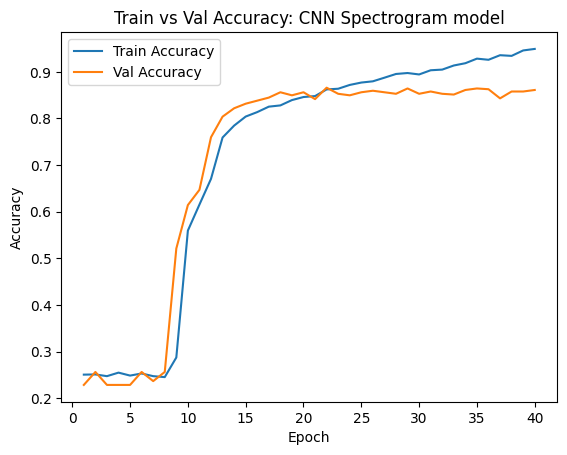

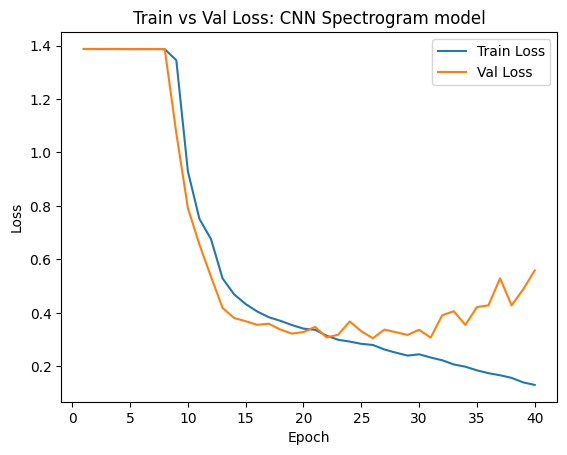

In [14]:
import matplotlib.pyplot as plt

def plot_curves():
  path = "/content/drive/My Drive/Chord_Model/CNN-specto/"

  train_acc = np.loadtxt("{}train_acc.csv".format(path))
  val_acc = np.loadtxt("{}val_acc.csv".format(path))
  train_loss = np.loadtxt("{}train_loss.csv".format(path))
  val_loss = np.loadtxt("{}val_loss.csv".format(path))

  plt.title("Train vs Val Accuracy: CNN Spectrogram model")
  n = len(train_acc)
  plt.plot(range(1, n+1), train_acc, label = "Train Accuracy")
  plt.plot(range(1, n+1), val_acc, label = "Val Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.title("Train vs Val Loss: CNN Spectrogram model")
  plt.plot(range(1, n+1), train_loss, label = "Train Loss")
  plt.plot(range(1, n+1), val_loss, label = "Val Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plot_curves()

In [20]:
#testing different hyperparams

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

model_specto2 = SpectrogramCNN()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_specto2.to(device)

criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model_specto2.parameters(), lr=0.0001)
optimizer = optim.SGD(model_specto2.parameters(), lr=0.001, momentum = 0.99)
num_epochs = 40

train_model_CNN_spec(model_specto2, train_loader, val_loader, num_epochs, criterion, optimizer)


Starting Training
Epoch 1/40, Train Loss: 1.3871, Train Acc: 0.2463, || Val Loss: 1.3855, Val Acc: 0.2565
Epoch 2/40, Train Loss: 1.3873, Train Acc: 0.2437, || Val Loss: 1.3873, Val Acc: 0.2288
Epoch 3/40, Train Loss: 1.3867, Train Acc: 0.2510, || Val Loss: 1.3854, Val Acc: 0.2565
Epoch 4/40, Train Loss: 1.3869, Train Acc: 0.2471, || Val Loss: 1.3882, Val Acc: 0.2288
Epoch 5/40, Train Loss: 1.3866, Train Acc: 0.2543, || Val Loss: 1.3869, Val Acc: 0.2565
Epoch 6/40, Train Loss: 1.3868, Train Acc: 0.2396, || Val Loss: 1.3873, Val Acc: 0.2288
Epoch 7/40, Train Loss: 1.3871, Train Acc: 0.2565, || Val Loss: 1.3882, Val Acc: 0.2565
Epoch 8/40, Train Loss: 1.3872, Train Acc: 0.2537, || Val Loss: 1.3858, Val Acc: 0.2598
Epoch 9/40, Train Loss: 1.3861, Train Acc: 0.2520, || Val Loss: 1.3868, Val Acc: 0.2565
Epoch 10/40, Train Loss: 1.3859, Train Acc: 0.2529, || Val Loss: 1.3853, Val Acc: 0.2565
Epoch 11/40, Train Loss: 1.3863, Train Acc: 0.2486, || Val Loss: 1.3842, Val Acc: 0.2876
Epoch 12/40,

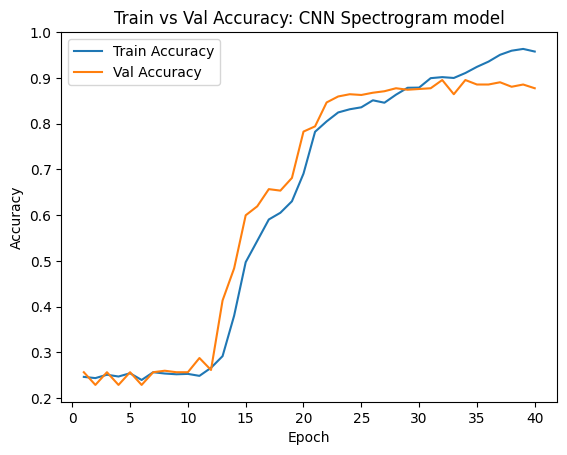

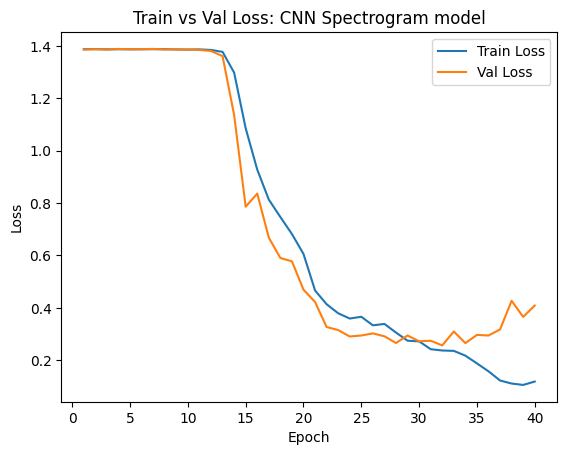

In [21]:
plot_curves()

Looks like the model overfit around 35, so lets cut it off before that.

In [22]:
import torch.optim as optim

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

model_specto3 = SpectrogramCNN()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_specto3.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_specto3.parameters(), lr=0.001, momentum = 0.99)
num_epochs = 35

train_model_CNN_spec(model_specto3, train_loader, val_loader, num_epochs, criterion, optimizer)


Starting Training
Epoch 1/35, Train Loss: 1.3869, Train Acc: 0.2422, || Val Loss: 1.3883, Val Acc: 0.2288
Epoch 2/35, Train Loss: 1.3871, Train Acc: 0.2514, || Val Loss: 1.3858, Val Acc: 0.2614
Epoch 3/35, Train Loss: 1.3869, Train Acc: 0.2457, || Val Loss: 1.3874, Val Acc: 0.2565
Epoch 4/35, Train Loss: 1.3870, Train Acc: 0.2539, || Val Loss: 1.3857, Val Acc: 0.2565
Epoch 5/35, Train Loss: 1.3867, Train Acc: 0.2518, || Val Loss: 1.3862, Val Acc: 0.2663
Epoch 6/35, Train Loss: 1.3863, Train Acc: 0.2531, || Val Loss: 1.3867, Val Acc: 0.2565
Epoch 7/35, Train Loss: 1.3864, Train Acc: 0.2449, || Val Loss: 1.3873, Val Acc: 0.2288
Epoch 8/35, Train Loss: 1.3867, Train Acc: 0.2500, || Val Loss: 1.3862, Val Acc: 0.2614
Epoch 9/35, Train Loss: 1.3867, Train Acc: 0.2441, || Val Loss: 1.3867, Val Acc: 0.2565
Epoch 10/35, Train Loss: 1.3859, Train Acc: 0.2676, || Val Loss: 1.3841, Val Acc: 0.2565
Epoch 11/35, Train Loss: 1.3845, Train Acc: 0.2641, || Val Loss: 1.3831, Val Acc: 0.3578
Epoch 12/35,

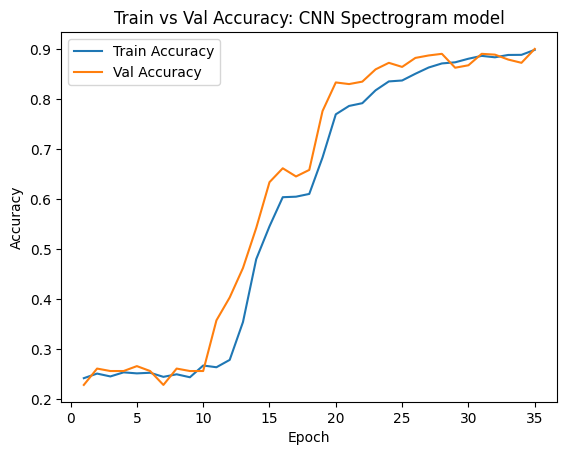

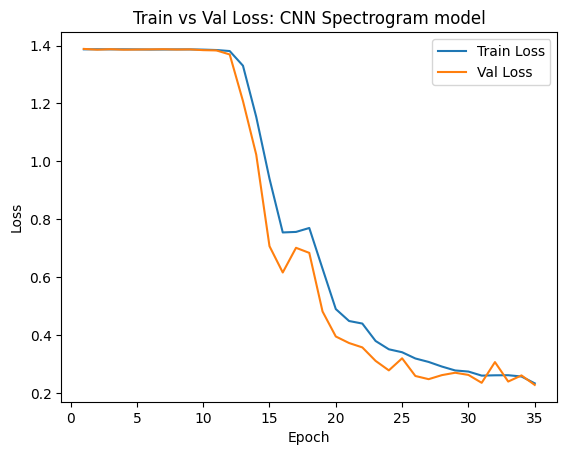

In [23]:
plot_curves()

In [35]:
torch.save(model_specto3.state_dict(), '/content/drive/MyDrive/APS360-project/model')
#saving model

In [24]:
def test_model(model, test_loader, criterion):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()
    test_loss = 0.0
    test_correct = 0
    total = 0

    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            #calculating loss
            loss = criterion(outputs, labels)
            test_loss += loss.item() * features.size(0)
            test_correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += features.size(0)

    avg_loss = test_loss / total
    accuracy = test_correct / total

    print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")

In [36]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, data_loader, dataset):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()
    all_preds = []
    all_labels = []

    misclassified_examples = []

    with torch.no_grad():
        for features, labels in data_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)  # Get predicted labels

            all_preds.extend(preds.cpu().numpy())  # Move to CPU and convert to NumPy
            all_labels.extend(labels.cpu().numpy())

            for i in range(len(preds)):
                if preds[i] != labels[i]:
                    misclassified_examples.append((features[i], labels[i], preds[i]))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    chord_labels = dataset.labels

    # Plot confusion matrix using Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples",
                xticklabels=chord_labels, yticklabels=chord_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    return misclassified_examples

Test Loss: 0.3622, Test Accuracy: 0.8513


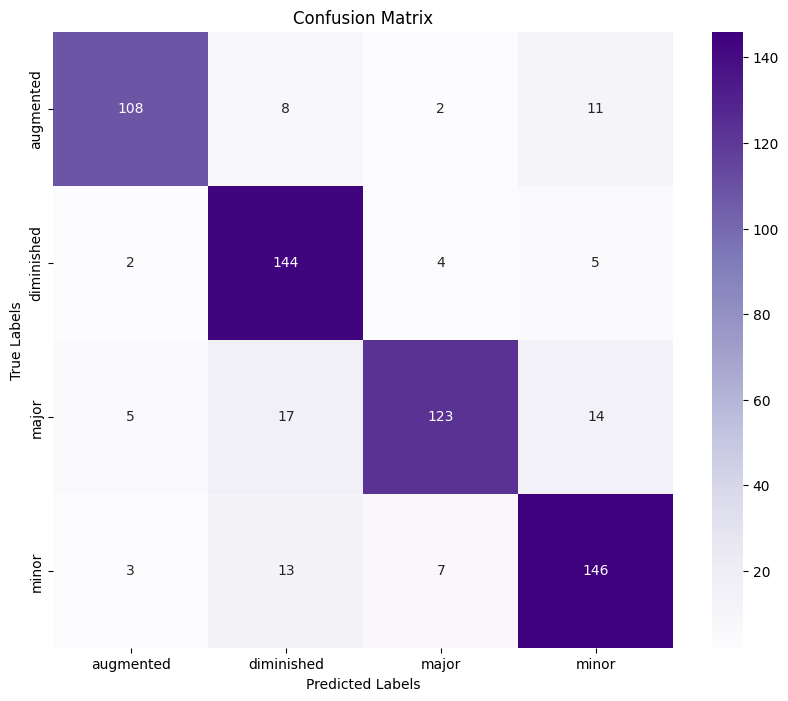

91 misclassified examples out of  612
Label: 0, Chord: augmented, length: 129
Label: 1, Chord: diminished, length: 155
Label: 2, Chord: major, length: 159
Label: 3, Chord: minor, length: 169


In [38]:
test_model(model_specto3, test_loader, criterion)
misclassified_examples = plot_confusion_matrix(model_specto3, test_loader, test_dataset)
print(len(misclassified_examples), "misclassified examples out of ", len(test_dataset))

for label, idx in test_dataset.label_to_idx.items():
    print(f"Label: {idx}, Chord: {label}, length: {len(test_dataset.data[test_dataset.data['label'] == label])}")

Test Loss: 0.3831, Test Accuracy: 0.8333


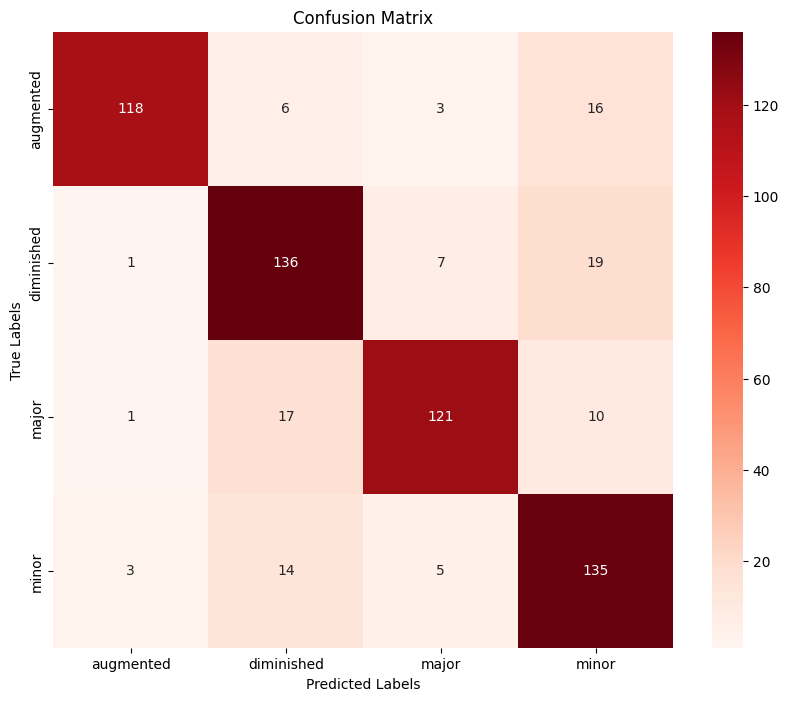

102 misclassified examples out of  612
Label: 0, Chord: augmented, length: 143
Label: 1, Chord: diminished, length: 163
Label: 2, Chord: major, length: 149
Label: 3, Chord: minor, length: 157


In [30]:
test_model(model_specto3, test_loader_new, criterion)
misclassified_examples_2 = plot_confusion_matrix(model_specto3, test_loader_new, test_dataset_new)
print(len(misclassified_examples_2), "misclassified examples out of ", len(test_dataset_new))

for label, idx in test_dataset_new.label_to_idx.items():
    print(f"Label: {idx}, Chord: {label}, length: {len(test_dataset_new.data[test_dataset_new.data['label'] == label])}")